# Исследование данных о продажах компьютерных игр в интернет-магазине «Стримчик»

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Задача** - нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Даны данные до 2016 года.

**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка и предобработка данных

### Загрузка данных

In [1]:
#используемые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#выведем датафрейм на экран
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Судя по всему, нужно будет привести названия столбцов к нижнему регистру

In [4]:
#посмотрим на информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Согласно предварительным данным, мы можем отметить необходимость дополнительной обработки данных, поскольку есть пропущенные данные в столбцах (Year_of_Release, Critic_Score, User_Score, Rating). Также нужно будет заменить тип данных в столбцах Year_of_Release, User_Score

In [5]:
#посчитаем количество пропусков
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

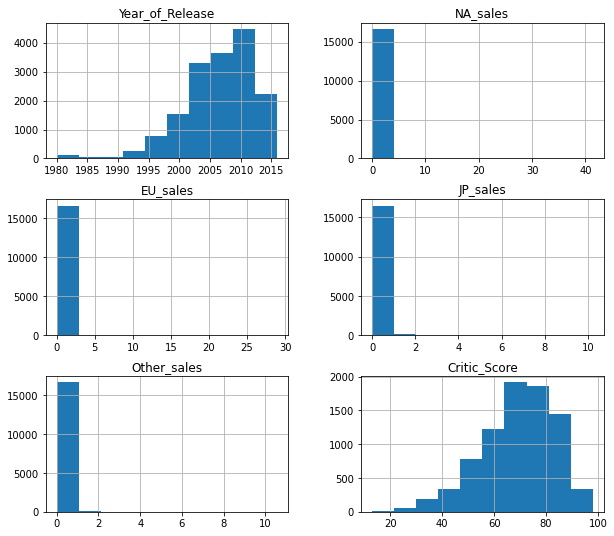

In [6]:
#Построим гистограммы
data.hist(figsize=(10,9));

#### Вывод:
На основе предоставленной информации, мы можем отметить необходимость дополнительной обработки данных, поскольку есть пропущенные данные в столбцах (Name, Genre, Year_of_Release, Critic_Score, User_Score, Rating). Также нужно будет заменить тип данных в столбцах Year_of_Release, User_Score. Также, нужно будет привести названия столбцов к нижнему регистру. 

### Предобработка данных

#### Приведение в порядок названия столбцов

In [7]:
data = data.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score', 'Rating':'rating'    })

In [8]:
#посмотрим на полученный датафрейм
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Изменение типов данных

In [9]:
# Заменим тип данных в столбце year_of_release на целочисленный с помощью метода astype()
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [10]:
#Проверим результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


У столбца user_score тип данных object, что необычно для числовых данных. Вероятно, содержит текстовые значения. такие как "tbd" (to be determined). Если вы хотите проводить математические операции, нужно преобразовать в числовой формат. При этом, вероятно, вам придется обработать значения "tbd" (например, заменить их на NaN).

In [11]:
#Посмотрим на уникальные значения этого столбца
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видно, что помимо числовых значений у нас есть 'nan' и 'tbd'. Если мы хотим проводить математические операции, нужно преобразовать в числовой формат. При этом, вероятно, придется обработать значения "tbd". Попробуем заменить их на NaN.

In [12]:
# Заменим 'tbd' на NaN
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [13]:
#Проверим
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [14]:
#Проверим, удалось ли заменить тип столбца
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [15]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Поиск и удаление дубликатов

In [16]:
# Посмотрим на наличие дубликатов
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16710    False
16711    False
16712    False
16713    False
16714    False
Length: 16715, dtype: bool

In [17]:
#Посчитаем количество дубликатов
data.duplicated().sum()

0

Дубликатов не обнаружено

Далее попробуем выявить неявные дубликаты

In [18]:
#Посмотрим на столбец genre
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Здесь дубликатов не обнаружено, единственное, видим наличие nan, который в дальнейшем мы удалим

In [19]:
# Теперь получим уникальные значения в столбце 'name'
unique_names = pd.Series(data['name'].unique())

In [20]:
# Поскольку таких данных много, выведем уникальные значения поочередно
for name in unique_names:
    print(name)

Wii Sports
Super Mario Bros.
Mario Kart Wii
Wii Sports Resort
Pokemon Red/Pokemon Blue
Tetris
New Super Mario Bros.
Wii Play
New Super Mario Bros. Wii
Duck Hunt
Nintendogs
Mario Kart DS
Pokemon Gold/Pokemon Silver
Wii Fit
Kinect Adventures!
Wii Fit Plus
Grand Theft Auto V
Grand Theft Auto: San Andreas
Super Mario World
Brain Age: Train Your Brain in Minutes a Day
Pokemon Diamond/Pokemon Pearl
Super Mario Land
Super Mario Bros. 3
Grand Theft Auto: Vice City
Pokemon Ruby/Pokemon Sapphire
Brain Age 2: More Training in Minutes a Day
Pokemon Black/Pokemon White
Gran Turismo 3: A-Spec
Call of Duty: Modern Warfare 3
Pokémon Yellow: Special Pikachu Edition
Call of Duty: Black Ops 3
Call of Duty: Black Ops
Pokemon X/Pokemon Y
Call of Duty: Black Ops II
Call of Duty: Modern Warfare 2
Grand Theft Auto III
Super Smash Bros. Brawl
Mario Kart 7
Animal Crossing: Wild World
Halo 3
Super Mario 64
Pokemon HeartGold/Pokemon SoulSilver
Pokemon Omega Ruby/Pokemon Alpha Sapphire
Gran Turismo 4
Super Mario G

In [21]:
#Посмотрим на столбец platform
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [22]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Посмотрим, что означают эти аббревиатуры:
'E': Everyone
'M': Mature
'T': Teen
'E10+': Everyone 10 and older
'K-A': Kids to Adults (устаревшее значение, эквивалентно 'E')
'AO': Adults Only
'EC': Early Childhood
'RP': Rating Pending
Все эти значения кажутся правильными для столбца 'rating' в контексте оценок компьютерных игр.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Для выявления неявных дубликатов, которые могли возникнуть из-за ошибок в данных (например, повторы ввода информации о той же игре), можно проверить комбинации нескольких столбцов на уникальность. В данном случае, возможно, стоит проверить комбинацию столбцов 'name', 'platform' и 'year_of_release'.

In [24]:
# Проверим комбинацию столбцов на уникальность
duplicate_combinations = data.duplicated(subset=['name', 'platform', 'year_of_release'])

In [25]:
# Выведем строки, где обнаружены дубликаты
duplicates_data = data[duplicate_combinations]

In [26]:
duplicates_data 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


В предоставленных данных видно две строки, которые могут рассматриваться как неявные дубликаты. Строка с индексом 14244 содержит пропуски в столбцах 'name', 'genre', 'critic_score', 'user_score', 'rating', что может указывать на ошибку или неполные данные. Кроме того, эта строка содержит значения 'NaN' в столбцах 'name' и 'genre'. Возможно, это ошибка в данных или случайный дубликат. Строка с индексом 16230 имеет те же значения в столбцах 'name', 'platform' и 'year_of_release', что и предыдущая строка. Однако, эта строка содержит значения в столбцах 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'. 
Удалим дубликаты

In [27]:
#Удалим дубликаты
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

#### Удаление и замена пропусков

In [28]:
#еще раз выведем информацию с количеством пропусков в каждом столбце
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

Пропуски в данных могут возникнуть по разным причинам. Вот несколько возможных объяснений для каждого из столбцов с пропусками. 1) name и genre. Вероятно, это пропуски данных в исходных источниках. Это может быть связано с ошибками в записи данных, неполной информацией или другими проблемами при сборе данных. 2) year_of_release. Пропуски могли возникнуть из-за того, что год выпуска не был указан в источнике данных, или из-за того, что эти игры были выпущены до введения системы отслеживания года выпуска. 3) critic_score, user_score, rating. Пропуски в оценках и рейтинге могут быть вызваны разными причинами, такими как отсутствие оценок от критиков или пользователей для некоторых игр, новизна игры (если данные собирались в определенный период), или ошибки при вводе данных. 

Пропусков в столбцах name, genre и year_of_release немного, поэтому просто их удалим

In [29]:
data = data.dropna(subset=['name','year_of_release','genre'])

In [30]:
#еще раз выведем информацию с количеством пропусков в каждом столбце
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Далее перейдем к столбцам critic_score и user_score. 

Text(0, 0.5, 'Частота')

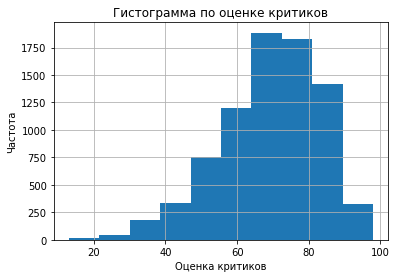

In [31]:
#Посмотрим на распределение данных в столбце 'critic_score'
data['critic_score'].hist()
plt.title('Гистограмма по оценке критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Частота')

In [32]:
#посмотрим на информацию об этом столбце
data['critic_score'].describe()

count    7982.000000
mean       68.992608
std        13.920049
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Средний балл в 68.99 указывает на то, что большинство игр получили оценки выше среднего уровня. Стандартное отклонение в 13.92 говорит о значительном разбросе оценок критиков, что свидетельствует о различиях в качестве игр. Разница между 25-м и 75-м процентилями (79 - 60 = 19) также указывает на существенные различия в оценках игр.

Text(0, 0.5, 'Частота')

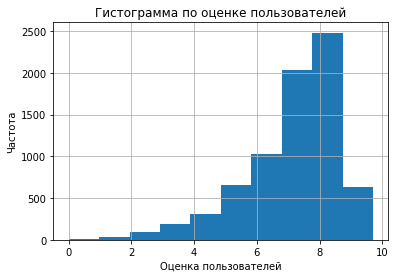

In [33]:
#Посмотрим на распределение данных в столбце 'user_score'
data['user_score'].hist()
plt.title('Гистограмма по оценке пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Частота')

In [34]:
data['user_score'].describe()

count    7462.000000
mean        7.126548
std         1.499429
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Средний балл в 7.13 указывает на то, что большинство игр получают положительные отзывы от пользователей. Стандартное отклонение в 1.50 указывает на сравнительно небольшой разброс оценок пользователей по сравнению с критиками, что может говорить о более согласованных мнениях пользователей. Разница между 25-м и 75-м процентилями (8.20 - 6.40 = 1.80) указывает на относительно небольшой разброс оценок в среднем диапазоне.

Поскольку пропущенных значений в столбцах 'critic_score'  и user_score - 8461, что составляет половину датасета, то просто оставим эти пропущенные значения как есть. 

In [35]:
#проверим 
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Остался незаполненный столбец rating, который содержит категориальные данные, которые сложно заменить на какое-то определенное значение. Поскольку, пропущенных значений много, то мы не можем их просто удалить. Попробуем просто ввести новую категорию 'unknown'

In [36]:
data['rating'].fillna('Unknown', inplace=True)

In [37]:
#посмотрим как сейчас выглядят данные этого столбца
data['rating'].unique()

array(['E', 'Unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [38]:
#проверим 
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Все возможные пропуски успешно заменены

#### Cуммарные продажи во всех регионах

Посчитаем суммарные продажи во всех регионах и создадим новый столбец all_sales

In [39]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [40]:
#Посмотрим на полученный датафрейм
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


Столбец all_sales успешно добавлен

### Вывод:  
В ходе предварительной обработки данных названия столбцов были приведены к нижнему регистру, обнаружены и заменены/удалены пропущенные значения в столбцах name, genre, year_of_release, rating. Также были заменены типы данных в столбцах year_of_release, user_score. Данные готовы к дальнейшему анализу.

## Исследовательский анализ данных

### Анализ количества игр, приходящихся на каждый год

In [41]:
#Посмотрим сколько игр выпускалось в каждом году
game_distribution = data['year_of_release'].value_counts().sort_values(ascending = True)

In [42]:
game_distribution

1980       9
1984      14
1985      14
1988      15
1987      16
1990      16
1989      17
1983      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      60
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     544
2014     581
2015     606
2012     652
2004     762
2003     775
2002     829
2005     939
2006    1006
2011    1136
2007    1197
2010    1255
2009    1426
2008    1427
Name: year_of_release, dtype: Int64

In [43]:
#отсортируем данные по годам
sorted_game_distribution = game_distribution.sort_index()

In [44]:
sorted_game_distribution

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

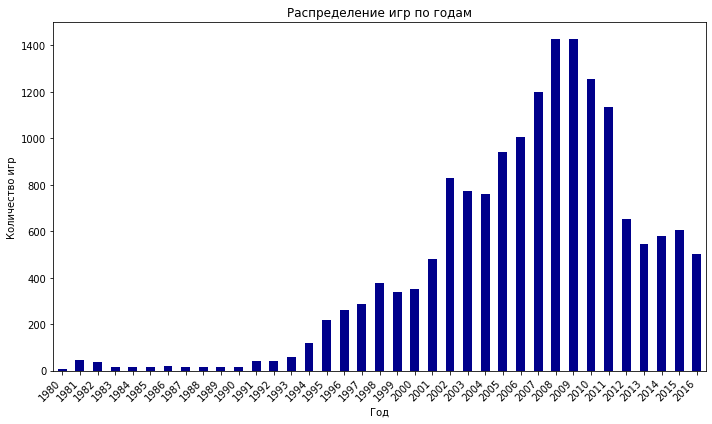

In [45]:
# Построим график для визуализации данных
plt.figure(figsize=(10, 6))
sorted_game_distribution.plot(kind='bar', color='darkblue')
plt.title('Распределение игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Судя по полученным данным, большинство игр выпускалось после 2000 года (больше всего в 2008 и 2009 гг), что логично. После 2009 г идет спад. Игр до 1995 г не много 

### Анализ динамики продаж по платформам.

In [46]:
#сгруппируем данные по платформам
platform_sales = data.groupby('platform')['all_sales'].sum().sort_values(ascending = False)

In [47]:
#посмотрим на полученные данные
platform_sales

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64

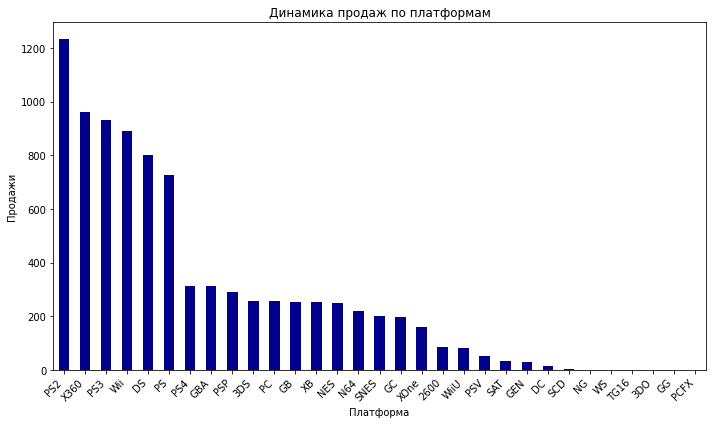

In [48]:
# Построим график для визуализации данных
plt.figure(figsize=(10, 6))
platform_sales.plot(kind='bar', color='darkblue')
plt.title('Динамика продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Как видно на гистограмме, PS2, X360,PS3, Wii, DS - платформы с наибольшим количеством продаж

Далее построим распределение общих продаж для указанных выше платформ по годам. 

In [49]:
#Выберем платформы PS2, X360,PS3, Wii, DS
selected_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [50]:
#Создадим новый датафрейм с данными только по выбранным платформам
selected_platforms_data = data[data['platform'].isin(selected_platforms)]

In [51]:
selected_platforms_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [52]:
#Сгруппируем данные по годам и платформам и получим суммы продаж
platforms_sales_by_year = selected_platforms_data.groupby(['year_of_release', 'platform'])['all_sales'].sum().reset_index()

In [53]:
#Посмотрим на полученную таблицу
platforms_sales_by_year

,year_of_release,platform,all_sales
0,1985,DS,0.02
1,2000,PS2,39.17
2,2001,PS2,166.43
3,2002,PS2,205.38
4,2003,PS2,184.31
5,2004,DS,17.27
6,2004,PS2,211.81
7,2005,DS,130.14
8,2005,PS2,160.66
9,2005,X360,8.25


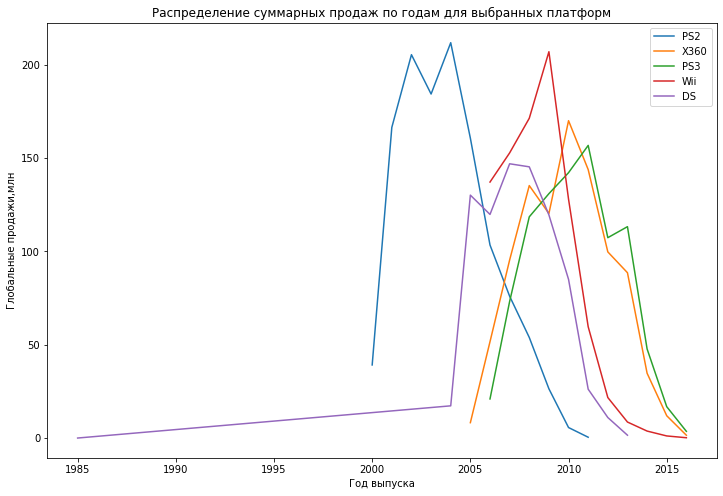

In [54]:
# Построим график распределения суммарных продаж по годам для выбранных платформ
plt.figure(figsize=(12, 8))
for platform in selected_platforms:
    platform_sales = platforms_sales_by_year[platforms_sales_by_year['platform'] == platform]
    plt.plot(platform_sales['year_of_release'], platform_sales['all_sales'], label=platform)
plt.title('Распределение суммарных продаж по годам для выбранных платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Глобальные продажи,млн')
plt.legend()
plt.show()

Судя по полученным данным, можно сказать следующее:
платформа DS появилась в 2004 году и пропала в 2013 (пик популярности пришелся на 2007-2008 г). То есть "время жизни" данной платформы -9-10 лет
платформа Wii появилась в 2006 году и пропала в 2016 (пик популярности пришелся на 2009 г, причем были самые высокие продажи). То есть "время жизни" данной платформы -9-10 лет
платформа X360 появилась в 2005 году и пропала в 2016 году (пик популярности пришелся на 2010- 2011 г). То есть "время жизни" данной платформы -9 лет
платформа PS3 появилась в 2006 году и пропала в 2016 году (пик популярности пришелся на 2011 г). То есть "время жизни" данной платформы - 10 лет.
Таким образом, период активности типичной игровой платформы составляет около 9-10 лет. Это включает в себя время от появления платформы на рынке до её исчезновения из-за устаревания или выхода следующего поколения. Пик популярности платформы часто приходится на середину её "времени жизни". Например, продажи игр на платформах PS2, X360, Wii, DS, PS3 достигают максимального уровня примерно через 4-5 лет после их появления на рынке.

Опираясь на предыдущие выводы о "времени жизни" платформ, можно принять период, включающий последние 5-10 лет, как актуальный для анализа и прогнозирования  на 2017 год. Таким образом, можно взять данные, например, за период с 2006 по 2016 год включительно, чтобы охватить смену поколений платформ и учесть современные тенденции. Этот временной интервал позволит учесть не только популярные и актуальные платформы, но и увидеть изменения в индустрии, такие как влияние мобильных игр, онлайн-платформ и т.д.

Далее возьмем для исследования только данные после 2013 года.

In [55]:
data = data.query('year_of_release > 2013')

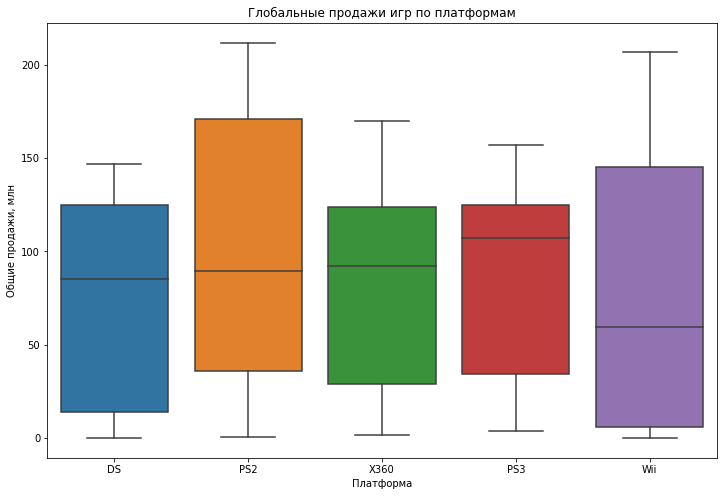

In [56]:
# Построим "ящик с усами" для общих продаж по платформам 
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='all_sales', data=platforms_sales_by_year)
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи, млн')
plt.show()

In [57]:
#для простоты анализа, посмотрим на данные для каждого "ящика", используя метод describe() 
platforms_sales_by_year.groupby("platform")["all_sales"].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
DS,11.0,72.980000,61.673155,0.02,14.1400,85.020,124.9750,146.94
PS2,12.0,102.796667,79.405729,0.45,35.9775,89.705,170.9000,211.81
PS3,11.0,84.666364,54.637149,3.60,34.3600,107.350,124.7250,156.78
Wii,11.0,81.016364,79.136330,0.18,6.1700,59.650,144.9600,206.97
X360,12.0,80.103333,57.484408,1.52,29.0450,91.995,124.0325,170.03


Судя по полученным данным, можно сказать следующее:
1) DS платформа: Медианное значение продаж составляет примерно 85.02 млн, с интерквартильным размахом от 14.14 до 124.98 млн. Усы ящика указывают на максимум (146.94) и минимум (1.54). Выбросов не обнаружено.
2) PS2 платформа: Медианное значение продаж составляет примерно 89.705 млн, с интерквартильным размахом от 35.98 до 170.90 млн. Усы ящика указывают на максимум (211.81) и минимум (0.45). Выбросов не обнаружено.
3) PS3 платформа: Медианное значение продаж составляет примерно 107.36 млн, с интерквартильным размахом от 34.36 до 124.72 млн. Усы ящика указывают на максимум (156.78) и минимум (3.6). Выбросов не обнаружено.
4) Wii платформа: Медианное значение продаж составляет примерно 59.65 млн, с интерквартильным размахом от 6.17 до 144.96 млн. Усы ящика указывают на максимум (206.97) и минимум (0.18). Выбросов не обнаружено.
5) X360 платформа: Медианное значение продаж составляет примерно 91.995 млн, с интерквартильным размахом от 29.04 до 124.03 млн. Усы ящика указывают на максимум (170.03) и минимум (1.52). Выбросов не обнаружено.
Таким образом, платформа DS имеет относительно большой интерквартильный размах и медианное значение, что указывает на разнообразие продаж. PS2, PS3 и X360 также имеют заметные интерквартильные размахи и медианные значения, свидетельствуя о различиях в продажах. Wii имеет медианное значение и интерквартильный размах, который, кажется, меньше по сравнению с другими платформами. PS2 обладает относительно высоким максимумом, а DS и Wii имеют сопоставимые минимумы. Новые значения средних и медианных продаж для каждой платформы также подтверждают эти выводы.

Далее посмотрим, как влияют на продажи внутри одной популярной платформы - X360 отзывы пользователей и критиков

In [58]:
X360_data = selected_platforms_data[selected_platforms_data['platform'] == 'X360']

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

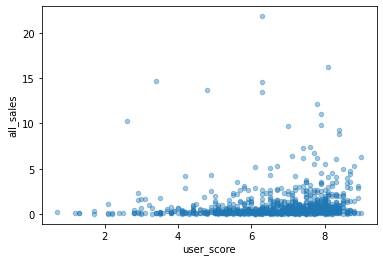

In [59]:
#Построим диаграмму рассеяния
X360_data.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.4) 

In [60]:
#Посмотрим коэффициент корреляции Пирсона для данных
X360_data['user_score'].corr(X360_data['all_sales'])

0.11418661214018049

Как видим, коэффициент корреляции положительный однако крайне близок к нулю.Это указывает на отсутствие сильной линейной зависимости между двумя переменными. Вероятно, это означает, что отзывы пользователей не имеют сильного влияния на продажи игр.

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

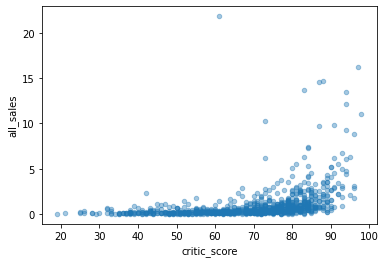

In [61]:
#Построим диаграмму рассеяния
X360_data.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.4) 

In [62]:
#Посмотрим коэффициент корреляции Пирсона для данных
X360_data['critic_score'].corr(X360_data['all_sales'])

0.39286589254006954

Как видим, коэффициент корреляции положительный однако все же близок к нулю. Это указывает на наличие слабой положительной линейной зависимости между двумя переменными. В данном случае можно сказать, что существует слабая положительная связь между отзывами критиков и продажами игр. Однако, такая зависимость сильнее, чем для отзывов пользователей, т.е отзывы критиков чуть сильнее оказывают влияние на продажи, чем отзывы пользователей. Хотя конечно в целом их влияние слабое.

Проверим с другими платформами

In [63]:
PS2_data = selected_platforms_data[selected_platforms_data['platform'] == 'PS2']

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

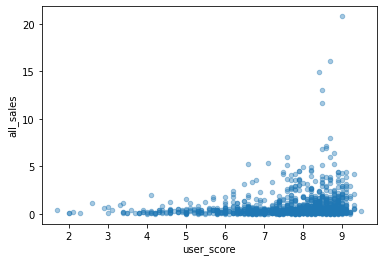

In [64]:
#Построим диаграмму рассеяния
PS2_data.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.4) 

In [65]:
#Посмотрим коэффициент корреляции Пирсона для данных
PS2_data['user_score'].corr(PS2_data['all_sales'])

0.1750550277038374

Как видим, коэффициент корреляции положительный однако все же крайне близок к нулю. Это указывает на наличие слабой положительной линейной зависимости между двумя переменными. В данном случае можно сказать, что существует слабая положительная связь между отзывами пользователей и продажами игр. 

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

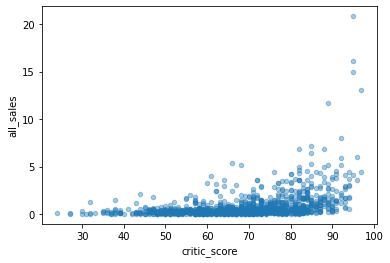

In [66]:
#Построим диаграмму рассеяния
PS2_data.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.4) 

In [67]:
#Посмотрим коэффициент корреляции Пирсона для данных
PS2_data['critic_score'].corr(PS2_data['all_sales'])

0.39253647544509007

Как видим, коэффициент корреляции положительный однако все же близок к нулю. Это указывает на наличие слабой положительной линейной зависимости между двумя переменными. В данном случае можно сказать, что существует слабая положительная связь между отзывами критиков и продажами игр. Однако, такая зависимость сильнее, чем для отзывов пользователей, т.е отзывы критиков чуть сильнее оказывают влияние на продажи, чем отзывы пользователей. Хотя конечно в целом их влияние слабое.

In [68]:
DS_data = selected_platforms_data[selected_platforms_data['platform'] == 'DS']

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

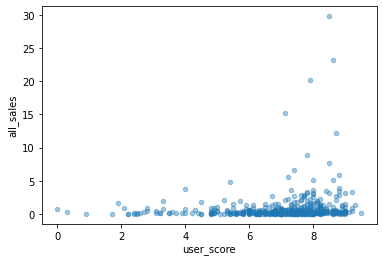

In [69]:
#Построим диаграмму рассеяния
DS_data.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.4) 

In [70]:
#Посмотрим коэффициент корреляции Пирсона для данных
DS_data['user_score'].corr(DS_data['all_sales'])

0.13087600975844202

Как видим, коэффициент корреляции положительный однако крайне близок к нулю.Это указывает на отсутствие сильной линейной зависимости между двумя переменными. Вероятно, это означает, что отзывы пользователей не имеют сильного влияния на продажи игр.

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

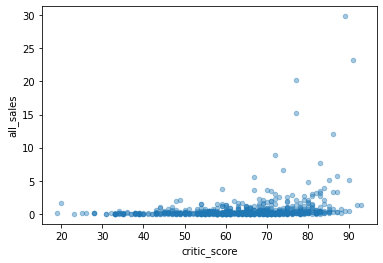

In [71]:
#Построим диаграмму рассеяния
DS_data.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.4) 

In [72]:
#Посмотрим коэффициент корреляции Пирсона для данных
DS_data['critic_score'].corr(DS_data['all_sales'])

0.23754579854113453

Как видим, коэффициент корреляции положительный однако все же близок к нулю. Это указывает на наличие слабой положительной линейной зависимости между двумя переменными. В данном случае можно сказать, что существует слабая положительная связь между отзывами критиков и продажами игр. Однако, такая зависимость сильнее, чем для отзывов пользователей, т.е отзывы критиков чуть сильнее оказывают влияние на продажи, чем отзывы пользователей. Хотя конечно в целом их влияние слабое.

Судя по всему, для всех платформ одна тенденция - зависимость между продажами и отзывами критиков и пользователей - слабая. Однако, критики способны оказать  чуть большее влияние на продажи, чем пользователи.

### Анализ продаж по жанрам игр

In [73]:
#сгруппируем данные по жанрам
genre_sales = data.groupby('genre')['all_sales'].sum().sort_values(ascending = False)

In [74]:
genre_sales

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: all_sales, dtype: float64

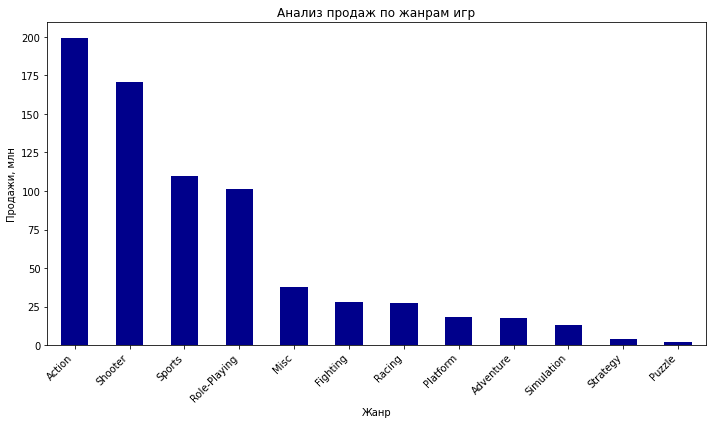

In [75]:
#Визуализируем полученные данные
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='darkblue')
plt.title('Анализ продаж по жанрам игр')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Судя по полученным данным, наиболее прибыльными являются жанры Action, Sports, Shooter, Music и далее. Жанры с самой низкой прибылью - Puzzle и Strategy. 

In [76]:
#посмотрим по медиане 
genre_sales_median = data.groupby('genre')['all_sales'].agg(['median']).reset_index()

In [77]:
genre_sales_median = genre_sales_median.sort_values(by='median', ascending = False)

In [78]:
genre_sales_median

,genre,median
8,Shooter,0.515
10,Sports,0.180
4,Platform,0.140
2,Fighting,0.125
7,Role-Playing,0.110
9,Simulation,0.100
0,Action,0.090
3,Misc,0.090
6,Racing,0.090
11,Strategy,0.060


<Figure size 1080x576 with 0 Axes>

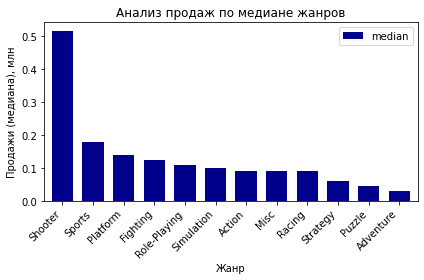

In [79]:
plt.figure(figsize=(15, 8))
genre_sales_median.plot(kind='bar', x='genre', y='median', color='darkblue', width=0.7)
plt.title('Анализ продаж по медиане жанров')
plt.xlabel('Жанр')
plt.ylabel('Продажи (медиана), млн')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

При анализе жанров по медиане продаж, лидирующие позиции занимают: Shooter	0.515, Sports	0.180, Platform	0.140, Fighting 0.125. Жанры с самой низкой прибылью - Puzzle	0.045 и Adventure	0.030

In [80]:
#Посмотрим по среднему значению 
genre_sales_mean = data.groupby('genre')['all_sales'].agg(['mean']).reset_index()

In [81]:
genre_sales_mean = genre_sales_mean.sort_values(by='mean', ascending = False)

In [82]:
genre_sales_mean

,genre,mean
8,Shooter,1.335469
10,Sports,0.680000
4,Platform,0.476053
2,Fighting,0.470333
7,Role-Playing,0.459005
6,Racing,0.398841
3,Misc,0.332301
0,Action,0.322068
9,Simulation,0.298409
5,Puzzle,0.157857


<Figure size 1080x576 with 0 Axes>

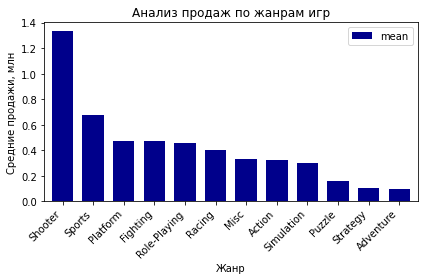

In [83]:
#Визуализируем полученные данные
plt.figure(figsize=(15, 8))
genre_sales_mean.plot(kind='bar', x='genre', y='mean', color='darkblue', width=0.7)
plt.title('Анализ продаж по жанрам игр')
plt.xlabel('Жанр')
plt.ylabel('Средние продажи, млн')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

При анализе жанров по среднеиу значению продаж, лидирующие позиции также занимают: Shooter	1.33546,	Sports	0.680000, Platform	0.476053 и Fighting	0.470333. Жанры с самой низкой прибылью - Strategy	0.107027 и Adventure	0.094865

Проведенный анализ продаж видеоигр по жанрам, основанный на оценке общих продаж, медианы и среднего значения, выявил интересные тенденции и различия. По общим продажам лидирующими жанрами являются Action, Shooter и Sports, занимая первые три позиции. Action имеет самые высокие общие продажи, достигая 199.36 миллионов копий, что значительно превосходит остальные жанры. Shooter и Sports также показывают впечатляющие результаты, с общими продажами в районе 170.94 и 109.48 миллионов копий соответственно.
Однако при рассмотрении медианы, которая представляет собой среднюю продажу в серии игр, результаты меняются. Shooter сохраняет лидерство, имея медианную продажу в 0.515 миллионов копий, что указывает на стабильно высокие продажи каждой отдельной игры в этом жанре. В то время как Sports и Platform занимают второе и третье места с медианной продажей 0.180 и 0.140 миллиона копий соответственно. Среднее значение (mean) также отражает средние продажи в серии игр по жанрам. Shooter, Sports и Platform сохраняют свои лидирующие позиции, но с измененным порядком: Shooter имеет самые высокие средние продажи (1.34 миллиона копий), а Sports и Platform следуют за ними с 0.68 и 0.48 миллионами копий соответственно.
Различия между общими продажами, медианой и средними значениями объясняются наличием выбросов и неоднородностью распределения данных внутри каждого жанра. Например, высокие общие продажи в жанре Action могут быть обусловлены несколькими очень успешными играми, в то время как медиана и среднее значение учитывают более широкий спектр продаж внутри этого жанра.

###  Вывод: 
Анализируя предоставленные данные, можно сделать следующие выводы:
Большинство игр выпускалось после 2000 года, с пиком в 2008 и 2009 годах.
Платформы PS2, X360, PS3, Wii и DS являются лидерами по количеству продаж, с каждой из них связан свой период активности и пик популярности.
"Время жизни" типичной игровой платформы составляет около 9-10 лет, включая период от появления на рынке до исчезновения из-за устаревания или выхода следующего поколения. Пик популярности часто приходится на середину "времени жизни" платформы.
Период с 2006 по 2016 год включительно можно принять как актуальный для анализа и прогнозирования на 2017 год, учитывая смену поколений платформ и современные тенденции в индустрии.
Глобальные продажи по платформам имеют разные медианные значения и интерквартильные размахи, что указывает на разнообразие продаж в зависимости от платформы.
Влияние отзывов на продажи игр среди выбранных платформ слабо, но критики оказывают немного большее влияние, чем пользователи.
Анализ продаж видеоигр по жанрам выявил, что жанры Action, Shooter и Sports имеют высокие общие продажи, однако при рассмотрении медианы и среднего значения Shooter выделяется стабильно высокими продажами каждой отдельной игры, в то время как Sports и Platform показывают более умеренные, но стабильные результаты в среднем. Эти различия объясняются наличием выбросов и разнообразием продаж внутри каждого жанра.
Таким образом, анализ этих данных позволяет понять основные тенденции в индустрии видеоигр, определить успешные платформы и жанры, что может быть полезно при принятии решений в сфере разработки и маркетинга игр.

## Портрет пользователя каждого региона

Начнем с Северной Америки

### Анализ продаж в Северной Америке

In [84]:
#сгруппируем данные по платформам для Северной Америки
na_sales_platform = data.groupby('platform')['na_sales'].sum().sort_values(ascending = False)

In [85]:
na_sales_platform

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
WiiU    19.36
PC       7.23
PSV      2.52
Wii      2.08
PSP      0.00
Name: na_sales, dtype: float64

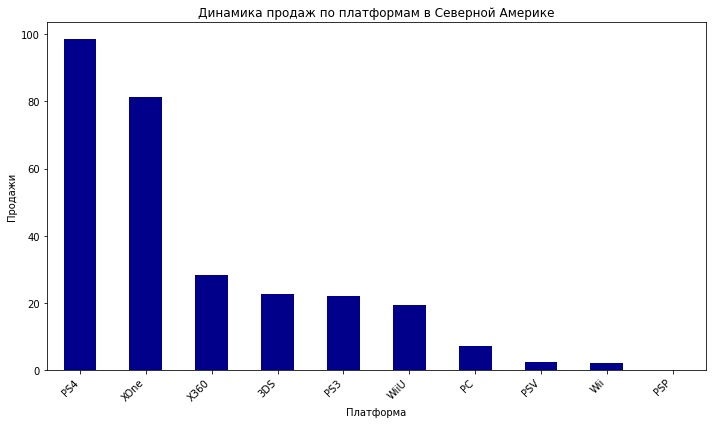

In [86]:
# Построим график для визуализации данных
plt.figure(figsize=(10, 6))
na_sales_platform.plot(kind='bar', color='darkblue')
plt.title('Динамика продаж по платформам в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

В Северной Америке наибольшей популярностью (соответственно и большие продажи) пользуются платформы: X360, PS2, Wii, PS3 и DS

In [87]:
#сгруппируем данные по жанрам для Северной Америки
na_sales_genre = data.groupby('genre')['na_sales'].sum().sort_values(ascending = False)

In [88]:
na_sales_genre

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Fighting        12.43
Racing           8.74
Platform         6.79
Adventure        5.64
Simulation       2.63
Strategy         0.98
Puzzle           0.65
Name: na_sales, dtype: float64

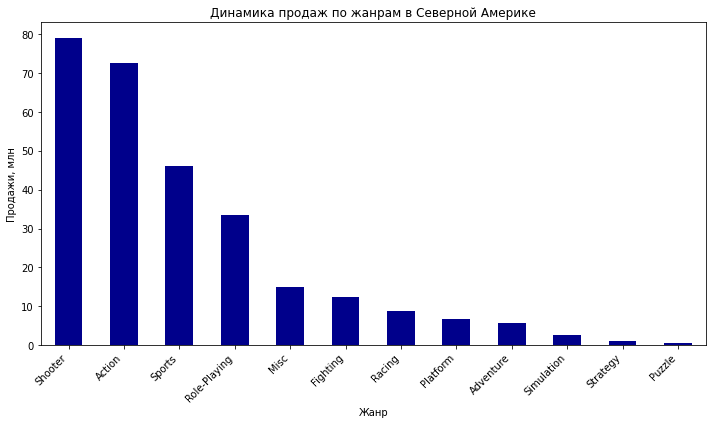

In [89]:
# Построим график для визуализации данных
plt.figure(figsize=(10, 6))
na_sales_genre.plot(kind='bar', color='darkblue')
plt.title('Динамика продаж по жанрам в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Самые продаваемые игры в Северной Америке - Action, Sports, Shooter, Music и Role-Playing

In [90]:
# Влияние рейтинга ESRB на продажи в Северной Америке
na_sales_rating = data.groupby('rating')['na_sales'].sum().sort_values(ascending = False)

In [91]:
na_sales_rating

rating
M          96.42
Unknown    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

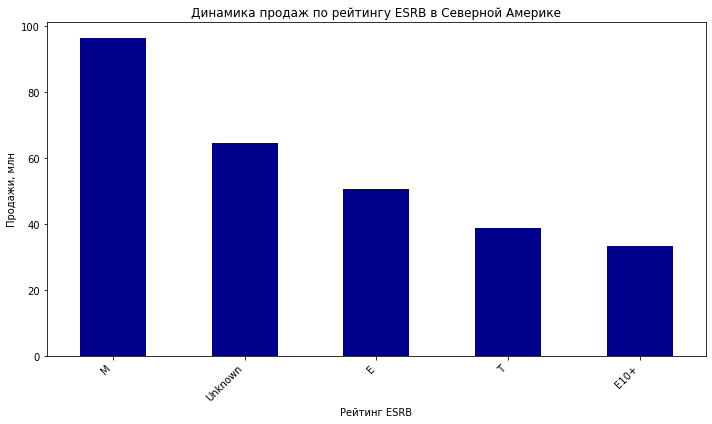

In [92]:
# Построим график для визуализации данных
plt.figure(figsize=(10, 6))
na_sales_rating.plot(kind='bar', color='darkblue')
plt.title('Динамика продаж по рейтингу ESRB в Северной Америке')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи, млн')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Исходя из результатов анализа продаж в зависимости от рейтинга ESRB в регионе Северной Америки, можно сделать следующие выводы:
Наибольшие продажи у игр с рейтингом "E". Игры с рейтингом "E" (для всех возрастов) имеют самые высокие продажи среди всех рейтингов. Это может свидетельствовать о том, что широкая аудитория, включая игроков всех возрастов, предпочитает игры с таким рейтингом. Игры с рейтингом "M" (Mature) следуют после. Игры с рейтингом "M" (17 и старше) также имеют значительные продажи, хотя немного уступают играм с рейтингом "E". Это может быть связано с тем, что подростки и взрослые предпочитают более зрелый контент. Рейтинг "T" (Teen) на третьем месте. Игры, получившие рейтинг "T" (13 и старше), также имеют заметные продажи, но они меньше по сравнению с "E" и "M". Это может указывать на то, что подростки также внимательны к рейтингам, но не исключительно.
Игры, у которых отсутствует рейтинг или он неизвестен, также имеют существенные продажи. Это может быть связано с тем, что для некоторых игр рейтинг может не быть указан, но они все равно пользуются популярностью. Игры с рейтингами "E10+" (для всех 10 и старше), "EC" (Early Childhood), "AO" (только для взрослых) и "RP" (Rating Pending) имеют сравнительно меньшие продажи. Например, игры с рейтингом "AO" (только для взрослых) могут иметь ограниченный рынок из-за своего контента для взрослых.

### Анализ продаж в Европе

Теперь приступим к анализу продаж в Европе

In [93]:
#сгруппируем данные по платформам для Европы
eu_sales_platform = data.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)

In [94]:
eu_sales_platform

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
X360     15.49
WiiU     13.15
PSV       3.53
Wii       2.59
PSP       0.00
Name: eu_sales, dtype: float64

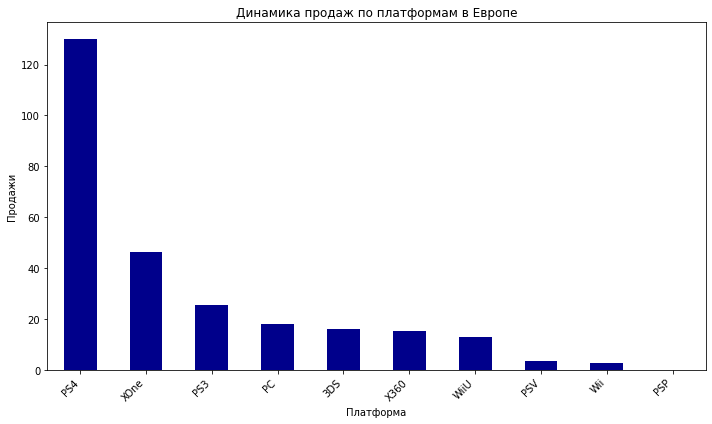

In [95]:
# Построим график для визуализации данных
plt.figure(figsize=(10, 6))
eu_sales_platform.plot(kind='bar', color='darkblue')
plt.title('Динамика продаж по платформам в Европе')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

В Европе наибольшей популярностью (соответственно и большие продажи) пользуются платформы (в порядке у меньшения): PS3, PS2, X360, Wii и DS.

In [96]:
#сгруппируем данные по жанрам для Европы
eu_sales_genre = data.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)

In [97]:
eu_sales_genre

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Misc            12.86
Simulation       7.30
Platform         6.80
Fighting         6.69
Adventure        6.49
Strategy         1.79
Puzzle           0.52
Name: eu_sales, dtype: float64

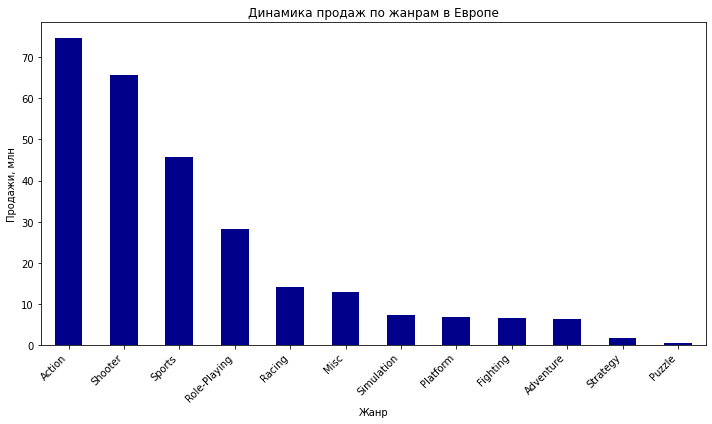

In [98]:
# Построим график для визуализации данных
plt.figure(figsize=(10, 6))
eu_sales_genre.plot(kind='bar', color='darkblue')
plt.title('Динамика продаж по жанрам в Европе')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Самые продаваемые игры в Европе - это игры в жанрах (в порядке уменьшения уровня продаж): Action, Sports, Shooter, Music и Racing

In [99]:
# Влияние рейтинга ESRB на продажи в Европе
eu_sales_rating = data.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)

In [100]:
eu_sales_rating

rating
M          93.44
Unknown    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

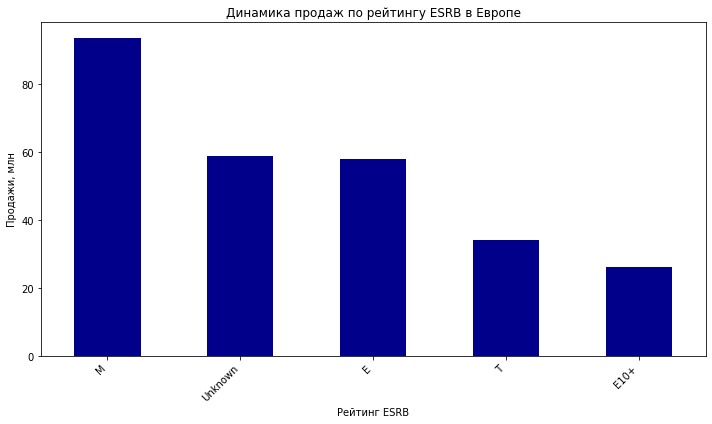

In [101]:
# Построим график для визуализации данных
plt.figure(figsize=(10, 6))
eu_sales_rating.plot(kind='bar', color='darkblue')
plt.title('Динамика продаж по рейтингу ESRB в Европе')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи, млн')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Исходя из результатов анализа продаж в зависимости от рейтинга ESRB в Европе, можно сделать следующие выводы:
Наибольшие продажи у игр с рейтингом "E". Игры с рейтингом "E" (для всех возрастов) имеют самые высокие продажи среди всех рейтингов. Это может свидетельствовать о том, что широкая аудитория, включая игроков всех возрастов, предпочитает игры с таким рейтингом. Игры с рейтингом "M" (Mature) следуют после. Игры с рейтингом "M" (17 и старше) также имеют значительные продажи, хотя немного уступают играм с рейтингом "E". Это может быть связано с тем, что подростки и взрослые предпочитают более зрелый контент. Рейтинг "T" (Teen) на третьем месте. Игры, получившие рейтинг "T" (13 и старше), также имеют заметные продажи, но они меньше по сравнению с "E" и "M". Это может указывать на то, что подростки также внимательны к рейтингам, но не исключительно.
Игры, у которых отсутствует рейтинг или он неизвестен, также имеют существенные продажи. Это может быть связано с тем, что для некоторых игр рейтинг может не быть указан, но они все равно пользуются популярностью. Игры с рейтингами  "EC" (Early Childhood), "AO" (только для взрослых) и "RP" (Rating Pending) имеют сравнительно меньшие продажи. Например, игры с рейтингом "AO" (только для взрослых) могут иметь ограниченный рынок из-за своего контента для взрослых.

### Анализ продаж в Японии

In [102]:
#сгруппируем данные по платформам для Японии
jp_sales_platform = data.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)

In [103]:
jp_sales_platform

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
PSP      0.36
XOne     0.32
X360     0.08
PC       0.00
Wii      0.00
Name: jp_sales, dtype: float64

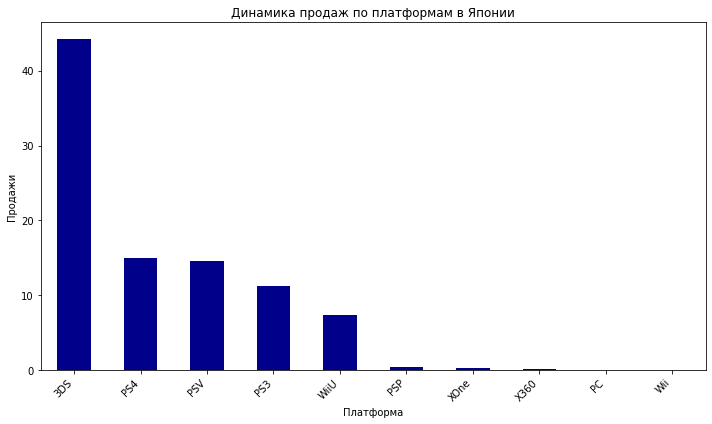

In [104]:
# Построим график для визуализации данных
plt.figure(figsize=(10, 6))
jp_sales_platform.plot(kind='bar', color='darkblue')
plt.title('Динамика продаж по платформам в Японии')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

В Японии наибольшей популярностью (соответственно и большие продажи) пользуются платформы (в порядке у меньшения): DS, PS2, 3DS, PS3, PSP.

In [105]:
#сгруппируем данные по жанрам для Японии
jp_sales_genre = data.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)

In [106]:
jp_sales_genre

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Adventure        3.60
Sports           3.26
Platform         2.69
Simulation       2.31
Racing           1.76
Strategy         0.95
Puzzle           0.93
Name: jp_sales, dtype: float64

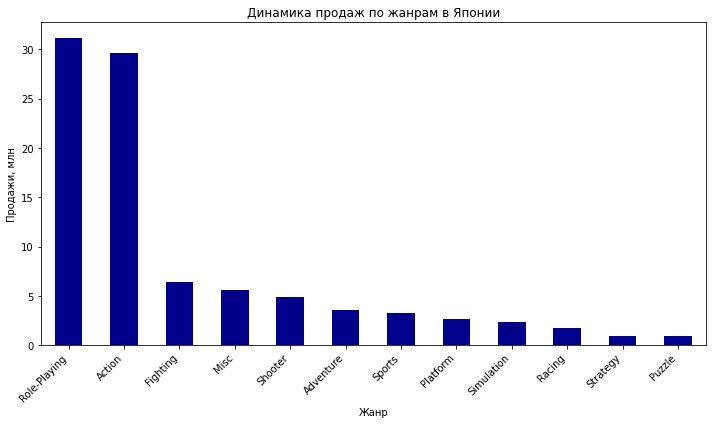

In [107]:
# Построим график для визуализации данных
plt.figure(figsize=(10, 6))
jp_sales_genre.plot(kind='bar', color='darkblue')
plt.title('Динамика продаж по жанрам в Японии')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Самые продаваемые игры в Японии - это игры в жанрах (в порядке уменьшения уровня продаж): Role-Playing, Action, Music, Sports и Platform.

In [108]:
# Влияние рейтинга ESRB на продажи в Японии
jp_sales_rating = data.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)

In [109]:
jp_sales_rating

rating
Unknown    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

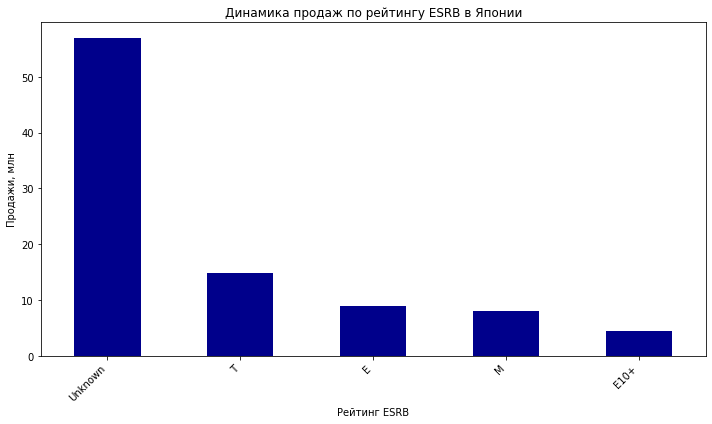

In [110]:
# Построим график для визуализации данных
plt.figure(figsize=(10, 6))
jp_sales_rating.plot(kind='bar', color='darkblue')
plt.title('Динамика продаж по рейтингу ESRB в Японии')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи, млн')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

В Японии наибольшие продажи у игр с неопределенным рейтингом, за ними следуют игры для всех возрастов ("E") и игры для подростков ("T"), в то время как игры для взрослых ("M") имеют значительно меньшую популярность. Игры с рейтингами  "EC" (Early Childhood), "AO" (только для взрослых) и "RP" (Rating Pending) имеют сравнительно меньшие продажи. Например, игры с рейтингом "AO" (только для взрослых) могут иметь ограниченный рынок из-за своего контента для взрослых.

### Анализ продаж в других странах

In [111]:
#сгруппируем данные по платформам для других стран
other_sales_platform = data.groupby('platform')['other_sales'].sum().sort_values(ascending = False)

In [112]:
other_sales_platform

platform
PS4     44.48
XOne    12.52
PS3      9.37
X360     4.35
3DS      3.68
WiiU     3.16
PC       1.85
PSV      1.81
Wii      0.40
PSP      0.00
Name: other_sales, dtype: float64

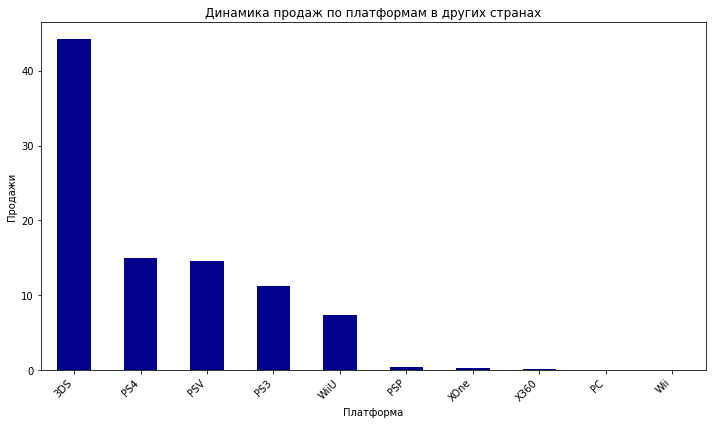

In [113]:
# Построим график для визуализации данных
plt.figure(figsize=(10, 6))
jp_sales_platform.plot(kind='bar', color='darkblue')
plt.title('Динамика продаж по платформам в других странах')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

В других странах наибольшей популярностью (соответственно и большие продажи) пользуются платформы (в порядке у меньшения): DS, PS2, 3DS, PS3, PSP.

In [114]:
#сгруппируем данные по жанрам для других стран
other_sales_genre = data.groupby('genre')['other_sales'].sum().sort_values(ascending = False)

In [115]:
other_sales_genre

genre
Action          22.57
Shooter         21.53
Sports          14.36
Role-Playing     8.64
Misc             4.03
Racing           2.89
Fighting         2.73
Adventure        1.82
Platform         1.81
Simulation       0.89
Strategy         0.24
Puzzle           0.11
Name: other_sales, dtype: float64

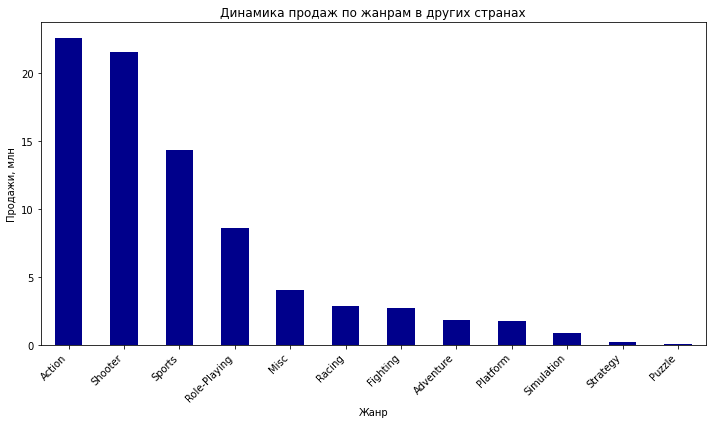

In [116]:
# Построим график для визуализации данных
plt.figure(figsize=(10, 6))
other_sales_genre.plot(kind='bar', color='darkblue')
plt.title('Динамика продаж по жанрам в других странах')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Самые продаваемые игры в других странах - это игры в жанрах (в порядке уменьшения уровня продаж): Action, Sports, Shooter, Music, Racing и Role-Playing. 

In [117]:
# Влияние рейтинга ESRB на продажи в других странах
other_sales_rating = data.groupby('rating')['other_sales'].sum().sort_values(ascending = False)

In [118]:
other_sales_rating

rating
M          28.67
Unknown    18.40
E          15.39
T          11.33
E10+        7.83
Name: other_sales, dtype: float64

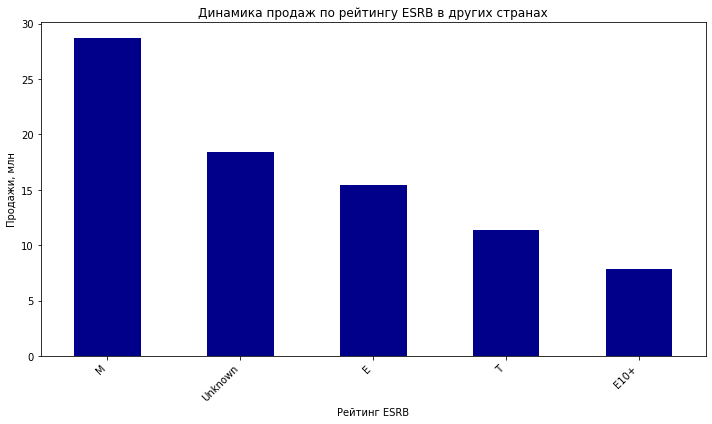

In [119]:
# Построим график для визуализации данных
plt.figure(figsize=(10, 6))
other_sales_rating.plot(kind='bar', color='darkblue')
plt.title('Динамика продаж по рейтингу ESRB в других странах')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи, млн')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Исходя из результатов анализа продаж в зависимости от рейтинга ESRB в других странах, можно сделать следующие выводы: Наибольшие продажи у игр с рейтингом "E". Игры с рейтингом "E" (для всех возрастов) имеют самые высокие продажи среди всех рейтингов. Это может свидетельствовать о том, что широкая аудитория, включая игроков всех возрастов, предпочитает игры с таким рейтингом. Игры с рейтингом "M" (Mature) следуют после. Игры с рейтингом "M" (17 и старше) также имеют значительные продажи, хотя немного уступают играм с рейтингом "E". Это может быть связано с тем, что подростки и взрослые предпочитают более зрелый контент. Рейтинг "T" (Teen) на третьем месте. Игры, получившие рейтинг "T" (13 и старше), также имеют заметные продажи, но они меньше по сравнению с "E" и "M". Это может указывать на то, что подростки также внимательны к рейтингам, но не исключительно. Игры, у которых отсутствует рейтинг или он неизвестен, также имеют существенные продажи. Это может быть связано с тем, что для некоторых игр рейтинг может не быть указан, но они все равно пользуются популярностью. Игры с рейтингами "EC" (Early Childhood), "AO" (только для взрослых) и "RP" (Rating Pending) имеют сравнительно меньшие продажи. Например, игры с рейтингом "AO" (только для взрослых) могут иметь ограниченный рынок из-за своего контента для взрослых.

### Вывод:
В Северной Америке наибольшей популярностью пользуются платформы X360, PS2, Wii, PS3 и DS, с высокими продажами игр в жанрах Action, Sports, Shooter, Music и Role-Playing. Рейтинг ESRB также оказывает влияние: игры с рейтингом "E" имеют самые высокие продажи, за ними следуют игры с рейтингом "M", "T", а также игры без указанного рейтинга. В Европе наибольшей популярностью пользуются платформы PS3, PS2, X360, Wii и DS, а самые продаваемые игры также принадлежат жанрам Action, Sports, Shooter, Music и Racing. Рейтинг ESRB влияет на предпочтения пользователей, где игры с рейтингом "E" лидируют по продажам, за ними идут игры с рейтингом "M", "T", а также игры без указанного рейтинга. В Японии популярны платформы DS, PS2, 3DS, PS3 и PSP, а продажи игр сосредоточены в жанрах Role-Playing, Action, Music, Sports и Platform. Уникальная особенность – высокие продажи игр без указанного рейтинга, с последующими предпочтениями игр с рейтингами "E" и "T", в то время как игры для взрослых имеют меньшую популярность.В других странах платформы DS, PS2, 3DS, PS3 и PSP также на пике популярности, с высокими продажами в жанрах Action, Sports, Shooter, Music, Racing и Role-Playing. Рейтинг ESRB также сказывается на продажи, где игры с рейтингом "E" лидируют, за ними следуют игры с рейтингами "M", "T", а также игры без указанного рейтинга.
Особенную специфичность в отличие от других стран стоит отметить для Японии, что скорее всего связано с ее культурными предпочтениями и особенностями.

## Проверка гипотез

### Нужно проверить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Если мы не можем заменить пропущенные значения и данные в оценках пользователей остаются недоступными, обработка с использованием t-теста может быть затруднительной. Тест требует наличия данных для сравнения, и если одна из выборок содержит много пропущенных значений, это может исказить результаты.

Для проверки гипотезы о том, равны ли средние пользовательские рейтинги платформ Xbox One и PC, можно воспользоваться статистическим анализом - t-тестом для независимых выборок. В данном случае, сравним средние пользовательские рейтинги для пользователей платформ Xbox One и PC. За нулевую гипотезу (H0) примем что они равны, альтернативная (H1) - что не равны.

In [120]:
from scipy import stats as st

In [121]:
#посмотрим еще раз на список платформ
data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Из предоставленного списка платформ видно, что среди них есть Xbox, а именно 'X360' и 'XOne'(который нам и нужен). Также есть платформа PC.

In [122]:
# Разделим данные на две выборки: xbox_one и pc 
xbox_one =  data[data['platform'] == 'XOne']['user_score']
pc = data[data['platform'] == 'PC']['user_score']

In [123]:
#Попробуем исключить NaN из выборки
xbox_one = xbox_one[~xbox_one.isna()]
pc = pc[~pc.isna()]

In [124]:
alpha = 0.05 # уровень статистической значимости

In [125]:
#функция ttest_ind выполняет тест для двух независимых выборок
results = st.ttest_ind(xbox_one, pc, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC различаются.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.")

p-значение: 0.11601398086668832
Не удалось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.


Не найдено статистически значимых различий между средними пользовательскими рейтингами на платформах Xbox One и PC. Таким образом, на основании проведенного теста, у нас нет достаточных доказательств для того, чтобы утверждать, что средние пользовательские рейтинги на этих платформах различаются.

### Проверим, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гипотезы о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны, можно воспользоваться статистическим анализом - t-тестом для двух независимых выборок. В данном случае, сравним средние пользовательские рейтинги для пользователей  жанров Action и Sports. За нулевую гипотезу (H0) примем что они равны, альтернативная (H1) - что не равны. Принятие нулевой гипотезы означает, что нет статистически значимых различий между средними рейтингами жанров Action и Sports. Альтернативная гипотеза предполагает, что различия в средних пользовательских рейтингах между этими жанрами существенны и не случайны.

In [126]:
data['user_score'].unique()

array([nan, 8.3, 4.3, 5.7, 5. , 6.5, 9.1, 6.1, 7.9, 5.4, 8.1, 6.4, 3.4,
       8.5, 4.8, 4.9, 4.5, 6.2, 8.4, 6.3, 7.7, 9.2, 7.6, 8.7, 6.7, 7. ,
       4.1, 8.2, 6.8, 5.5, 7.5, 4.4, 5.9, 7.2, 6.9, 3.9, 4.2, 3.2, 8.6,
       3.1, 9. , 7.3, 7.4, 6. , 4.7, 7.1, 8.8, 5.1, 6.6, 3. , 5.8, 2.9,
       8.9, 2.7, 8. , 3.5, 7.8, 5.2, 5.6, 4.6, 3.3, 9.3, 4. , 3.6, 3.7,
       2.4, 2.8, 5.3, 1.7, 1.6, 3.8, 1.5, 0.7, 2.5, 2. , 2.1, 0.2, 1.9,
       1.4, 2.3])

In [127]:
# Разделим данные на две выборки: action и sports 
action_data =  data[data['genre'] == 'Action']['user_score']
sports_data = data[data['genre'] == 'Sports']['user_score']

In [128]:
#Попробуем исключить NaN из выборки
action_data  = action_data [~action_data .isna()]
sports_data = sports_data[~sports_data.isna()]

In [129]:
alpha = 0.05 # уровень статистической значимости

In [130]:
results = st.ttest_ind(action_data, sports_data, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports различаются.')
else:
    print('Не отвергаем нулевую гипотезу: Нет оснований считать, что средние пользовательские рейтинги жанров Action и Sports различаются.') 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports различаются.


Есть статистически значимые различия между средними пользовательскими рейтингами жанров Action и Sports. Таким образом, у нас есть достаточно оснований предполагать, что пользовательские оценки для этих двух жанров различаются.

## Общий вывод
В ходе выполнения работы, был проведен анализ данных по видеоиграм с последующей подготовкой данных и исследовательским анализом. В ходе подготовки данных названия столбцов были приведены к нижнему регистру, и произведена коррекция типов данных. Обработаны пропущенные значения с объяснением выбора метода и обозначены причины возникновения пропусков. В исследовательском анализе данных определено количество выпущенных игр по годам, выделены платформы с наибольшими суммарными продажами, и построены распределения продаж по годам для этих платформ. Выделены лидирующие платформы по продажам, выявлены тенденции роста и спада.
Проведен анализ влияния отзывов пользователей и критиков на продажи, в том числе с построением диаграммы рассеяния и вычислением корреляции.В рамках составления портрета пользователя каждого региона определены топ-5 популярных платформ и жанров, а также изучено влияние рейтинга ESRB на продажи в отдельных регионах.
Завершены проверки двух гипотез: о равенстве средних пользовательских рейтингов платформ Xbox One и PC, а также о различии средних пользовательских рейтингов жанров Action и Sports.
Большинство игр выпущено после 2000 года, с пиком в 2008 и 2009 годах. Популярные платформы варьируются в зависимости от региона, но PS2, X360, PS3, Wii и DS общим образом лидируют по продажам. Время "жизни" игровой платформы в среднем составляет 9-10 лет. Региональные предпочтения различаются. В Северной Америке и Европе популярны PS2, X360, Wii, PS3 и DS, а также игры в жанрах Action, Sports, Shooter, Music и Role-Playing. В Японии DS, PS2, 3DS, PS3 и PSP популярны вместе с жанрами Role-Playing, Action, Music, Sports и Platform.Влияние отзывов на продажи ограничено, причем отзывы критиков имеют больший вес, чем пользовательские оценки. Наиболее прибыльные жанры - Action, Sports, Shooter, Music, а наименее - Puzzle и Strategy. Анализ гипотез показывает, что средние пользовательские рейтинги жанров Action и Sports различаются. Однако, нет статистически значимых различий между средними пользовательскими рейтингами платформ Xbox One и PC.
Рекомендации включают в себя учет региональных особенностей при разработке контента и маркетинговых стратегий, а также осмотрительное использование отзывов критиков для повышения продаж. Анализ данных предоставляет ценные данные для стратегических решений в индустрии видеоигр.